## Work
1. 請將 Epoch 加到 500 個，並觀察 learning curve 的走勢
2. 請將 Optimizer 換成 SGD，並觀察 learning curve 的走勢

In [12]:
import os
import keras

# 本作業可以不需使用 GPU, 將 GPU 設定為 "無" (若有 GPU 且想開啟，可設為 "0")
os.environ["CUDA_VISIBLE_DEVICES"] = ""

In [13]:
# 從 Keras 的內建功能中，取得 train 與 test 資料集
train, test = keras.datasets.cifar10.load_data()

In [14]:
# 將 X 與 Y 獨立放進變數
x_train, y_train = train
x_test, y_test = test
# 資料前處理 - 標準化
x_train = x_train / 255.
x_test = x_test / 255.

# 將資料從圖形 (RGB) 轉為向量 (Single Vector)
x_train = x_train.reshape((len(x_train), -1))
x_test = x_test.reshape((len(x_test), -1))

# 將目標轉為 one-hot encoding
y_train = keras.utils.to_categorical(y_train, num_classes=10)
y_test = keras.utils.to_categorical(y_test, num_classes=10)

In [15]:
def build_mlp():
    input_layer = keras.layers.Input([x_train.shape[-1]])
    x = keras.layers.Dense(units=512, activation="relu")(input_layer)
    x = keras.layers.Dense(units=256, activation="relu")(x)
    x = keras.layers.Dense(units=128, activation="relu")(x)
    out = keras.layers.Dense(units=10, activation="softmax")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

model = build_mlp()

W0712 15:16:13.631270 4440090048 deprecation_wrapper.py:119] From /anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0712 15:16:13.923374 4440090048 deprecation_wrapper.py:119] From /anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0712 15:16:14.046330 4440090048 deprecation_wrapper.py:119] From /anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.



In [16]:

# 用 Keras 內建方法檢視模型各層參數量
model.summary()

optimizer = keras.optimizers.SGD(lr=0.001)
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

W0712 15:16:14.382758 4440090048 deprecation_wrapper.py:119] From /anaconda3/lib/python3.7/site-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0712 15:16:14.417984 4440090048 deprecation_wrapper.py:119] From /anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:3295: The name tf.log is deprecated. Please use tf.math.log instead.



_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 512)               1573376   
_________________________________________________________________
dense_2 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_3 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_4 (Dense)              (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________


In [17]:

model.fit(x_train, y_train, 
          epochs=500, 
          batch_size=256, 
          validation_data=(x_test, y_test), 
          shuffle=True)

W0712 15:16:14.748208 4440090048 deprecation.py:323] From /anaconda3/lib/python3.7/site-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
W0712 15:16:14.937925 4440090048 deprecation_wrapper.py:119] From /anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.



Train on 50000 samples, validate on 10000 samples
Epoch 1/500
50000/50000 [==============================] - 14s 286us/step - loss: 2.2625 - acc: 0.1678 - val_loss: 2.2189 - val_acc: 0.2099
Epoch 2/500
50000/50000 [==============================] - 13s 259us/step - loss: 2.1841 - acc: 0.2261 - val_loss: 2.1566 - val_acc: 0.2412
Epoch 3/500
50000/50000 [==============================] - 13s 259us/step - loss: 2.1285 - acc: 0.2526 - val_loss: 2.1074 - val_acc: 0.2610
Epoch 4/500
50000/50000 [==============================] - 13s 268us/step - loss: 2.0847 - acc: 0.2711 - val_loss: 2.0681 - val_acc: 0.2774
Epoch 5/500
50000/50000 [==============================] - 13s 261us/step - loss: 2.0481 - acc: 0.2835 - val_loss: 2.0344 - val_acc: 0.2900
Epoch 6/500
50000/50000 [==============================] - 14s 271us/step - loss: 2.0165 - acc: 0.2956 - val_loss: 2.0050 - val_acc: 0.3058
Epoch 7/500
50000/50000 [==============================] - 13s 267us/step - loss: 1.9888 - acc: 0.3078 - val_l

Epoch 59/500
50000/50000 [==============================] - 13s 265us/step - loss: 1.6495 - acc: 0.4267 - val_loss: 1.6607 - val_acc: 0.4216
Epoch 60/500
50000/50000 [==============================] - 13s 264us/step - loss: 1.6463 - acc: 0.4284 - val_loss: 1.6525 - val_acc: 0.4261
Epoch 61/500
50000/50000 [==============================] - 13s 261us/step - loss: 1.6433 - acc: 0.4294 - val_loss: 1.6525 - val_acc: 0.4195
Epoch 62/500
50000/50000 [==============================] - 14s 270us/step - loss: 1.6404 - acc: 0.4298 - val_loss: 1.6483 - val_acc: 0.4284
Epoch 63/500
50000/50000 [==============================] - 13s 261us/step - loss: 1.6374 - acc: 0.4327 - val_loss: 1.6432 - val_acc: 0.4297
Epoch 64/500
50000/50000 [==============================] - 13s 259us/step - loss: 1.6340 - acc: 0.4326 - val_loss: 1.6426 - val_acc: 0.4285
Epoch 65/500
50000/50000 [==============================] - 13s 265us/step - loss: 1.6313 - acc: 0.4338 - val_loss: 1.6403 - val_acc: 0.4299
Epoch 66/500


50000/50000 [==============================] - 7s 136us/step - loss: 1.5073 - acc: 0.4756 - val_loss: 1.5335 - val_acc: 0.4594
Epoch 118/500
50000/50000 [==============================] - 7s 134us/step - loss: 1.5054 - acc: 0.4767 - val_loss: 1.5302 - val_acc: 0.4634
Epoch 119/500
50000/50000 [==============================] - 7s 134us/step - loss: 1.5032 - acc: 0.4783 - val_loss: 1.5294 - val_acc: 0.4621
Epoch 120/500
50000/50000 [==============================] - 7s 133us/step - loss: 1.5012 - acc: 0.4779 - val_loss: 1.5306 - val_acc: 0.4631
Epoch 121/500
50000/50000 [==============================] - 7s 134us/step - loss: 1.4998 - acc: 0.4787 - val_loss: 1.5299 - val_acc: 0.4597
Epoch 122/500
50000/50000 [==============================] - 7s 136us/step - loss: 1.4975 - acc: 0.4792 - val_loss: 1.5277 - val_acc: 0.4650
Epoch 123/500
50000/50000 [==============================] - 7s 143us/step - loss: 1.4959 - acc: 0.4804 - val_loss: 1.5266 - val_acc: 0.4626
Epoch 124/500
50000/50000 [

50000/50000 [==============================] - 7s 138us/step - loss: 1.4098 - acc: 0.5087 - val_loss: 1.4638 - val_acc: 0.4830
Epoch 176/500
50000/50000 [==============================] - 7s 138us/step - loss: 1.4085 - acc: 0.5098 - val_loss: 1.4627 - val_acc: 0.4846
Epoch 177/500
50000/50000 [==============================] - 7s 146us/step - loss: 1.4074 - acc: 0.5086 - val_loss: 1.4634 - val_acc: 0.4862
Epoch 178/500
50000/50000 [==============================] - 7s 148us/step - loss: 1.4055 - acc: 0.5098 - val_loss: 1.4688 - val_acc: 0.4760
Epoch 179/500
50000/50000 [==============================] - 8s 151us/step - loss: 1.4040 - acc: 0.5113 - val_loss: 1.4587 - val_acc: 0.4866
Epoch 180/500
50000/50000 [==============================] - 7s 148us/step - loss: 1.4026 - acc: 0.5112 - val_loss: 1.4668 - val_acc: 0.4807
Epoch 181/500
50000/50000 [==============================] - 7s 148us/step - loss: 1.4012 - acc: 0.5115 - val_loss: 1.4572 - val_acc: 0.4872
Epoch 182/500
50000/50000 [

50000/50000 [==============================] - 7s 140us/step - loss: 1.3285 - acc: 0.5362 - val_loss: 1.4170 - val_acc: 0.4992
Epoch 234/500
50000/50000 [==============================] - 7s 142us/step - loss: 1.3268 - acc: 0.5386 - val_loss: 1.4161 - val_acc: 0.5015
Epoch 235/500
50000/50000 [==============================] - 8s 152us/step - loss: 1.3259 - acc: 0.5379 - val_loss: 1.4125 - val_acc: 0.5005
Epoch 236/500
50000/50000 [==============================] - 7s 142us/step - loss: 1.3240 - acc: 0.5382 - val_loss: 1.4192 - val_acc: 0.4961
Epoch 237/500
50000/50000 [==============================] - 7s 138us/step - loss: 1.3233 - acc: 0.5386 - val_loss: 1.4393 - val_acc: 0.4940
Epoch 238/500
50000/50000 [==============================] - 7s 139us/step - loss: 1.3222 - acc: 0.5399 - val_loss: 1.4148 - val_acc: 0.5004l
Epoch 239/500
50000/50000 [==============================] - 7s 139us/step - loss: 1.3204 - acc: 0.5389 - val_loss: 1.4103 - val_acc: 0.5033
Epoch 240/500
50000/50000 

50000/50000 [==============================] - 7s 141us/step - loss: 1.2571 - acc: 0.5599 - val_loss: 1.3849 - val_acc: 0.5120
Epoch 292/500
50000/50000 [==============================] - 7s 149us/step - loss: 1.2553 - acc: 0.5602 - val_loss: 1.3888 - val_acc: 0.5116
Epoch 293/500
50000/50000 [==============================] - 7s 145us/step - loss: 1.2542 - acc: 0.5609 - val_loss: 1.3833 - val_acc: 0.5118
Epoch 294/500
50000/50000 [==============================] - 7s 144us/step - loss: 1.2538 - acc: 0.5615 - val_loss: 1.3902 - val_acc: 0.5122
Epoch 295/500
50000/50000 [==============================] - 7s 143us/step - loss: 1.2527 - acc: 0.5613 - val_loss: 1.3796 - val_acc: 0.5130
Epoch 296/500
50000/50000 [==============================] - 7s 146us/step - loss: 1.2518 - acc: 0.5615 - val_loss: 1.3743 - val_acc: 0.5156
Epoch 297/500
50000/50000 [==============================] - 7s 149us/step - loss: 1.2497 - acc: 0.5627 - val_loss: 1.3728 - val_acc: 0.5149
Epoch 298/500
50000/50000 [

50000/50000 [==============================] - 8s 157us/step - loss: 1.1927 - acc: 0.5817 - val_loss: 1.3778 - val_acc: 0.5168
Epoch 350/500
50000/50000 [==============================] - 7s 140us/step - loss: 1.1912 - acc: 0.5827 - val_loss: 1.3894 - val_acc: 0.5127
Epoch 351/500
50000/50000 [==============================] - 7s 140us/step - loss: 1.1902 - acc: 0.5816 - val_loss: 1.3534 - val_acc: 0.5243
Epoch 352/500
50000/50000 [==============================] - 7s 148us/step - loss: 1.1884 - acc: 0.5844 - val_loss: 1.3739 - val_acc: 0.5158
Epoch 353/500
50000/50000 [==============================] - 7s 139us/step - loss: 1.1875 - acc: 0.5847 - val_loss: 1.3737 - val_acc: 0.5129
Epoch 354/500
50000/50000 [==============================] - 7s 139us/step - loss: 1.1877 - acc: 0.5856 - val_loss: 1.3660 - val_acc: 0.5213
Epoch 355/500
50000/50000 [==============================] - 8s 157us/step - loss: 1.1854 - acc: 0.5845 - val_loss: 1.3592 - val_acc: 0.5168
Epoch 356/500
50000/50000 [

50000/50000 [==============================] - 8s 160us/step - loss: 1.1291 - acc: 0.6057 - val_loss: 1.3555 - val_acc: 0.5225
Epoch 408/500
50000/50000 [==============================] - 7s 148us/step - loss: 1.1301 - acc: 0.6061 - val_loss: 1.3500 - val_acc: 0.5227
Epoch 409/500
50000/50000 [==============================] - 8s 152us/step - loss: 1.1273 - acc: 0.6047 - val_loss: 1.3341 - val_acc: 0.5351
Epoch 410/500
50000/50000 [==============================] - 9s 173us/step - loss: 1.1275 - acc: 0.6046 - val_loss: 1.3560 - val_acc: 0.5169
Epoch 411/500
50000/50000 [==============================] - 8s 157us/step - loss: 1.1280 - acc: 0.6062 - val_loss: 1.3472 - val_acc: 0.5280
Epoch 412/500
50000/50000 [==============================] - 8s 156us/step - loss: 1.1259 - acc: 0.6062 - val_loss: 1.3352 - val_acc: 0.5323
Epoch 413/500
50000/50000 [==============================] - 8s 164us/step - loss: 1.1231 - acc: 0.6063 - val_loss: 1.3380 - val_acc: 0.5307
Epoch 414/500
50000/50000 [

50000/50000 [==============================] - 6s 122us/step - loss: 1.0709 - acc: 0.6252 - val_loss: 1.3301 - val_acc: 0.5343
Epoch 466/500
50000/50000 [==============================] - 6s 123us/step - loss: 1.0669 - acc: 0.6253 - val_loss: 1.3514 - val_acc: 0.5274
Epoch 467/500
50000/50000 [==============================] - 6s 124us/step - loss: 1.0696 - acc: 0.6254 - val_loss: 1.3422 - val_acc: 0.5331
Epoch 468/500
50000/50000 [==============================] - 6s 126us/step - loss: 1.0671 - acc: 0.6269 - val_loss: 1.3320 - val_acc: 0.5324
Epoch 469/500
50000/50000 [==============================] - 6s 125us/step - loss: 1.0667 - acc: 0.6262 - val_loss: 1.3406 - val_acc: 0.5318
Epoch 470/500
50000/50000 [==============================] - 7s 136us/step - loss: 1.0664 - acc: 0.6269 - val_loss: 1.3256 - val_acc: 0.5392
Epoch 471/500
50000/50000 [==============================] - 7s 147us/step - loss: 1.0644 - acc: 0.6294 - val_loss: 1.3425 - val_acc: 0.5320
Epoch 472/500
50000/50000 [

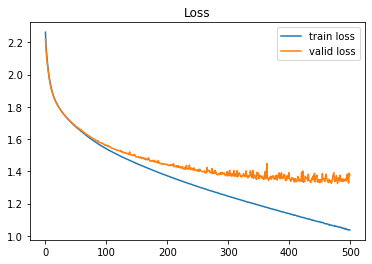

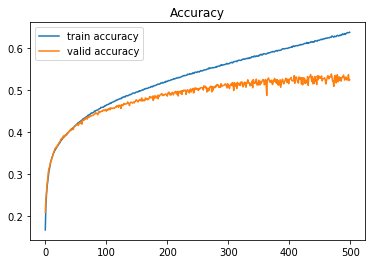

In [19]:
import matplotlib.pyplot as plt
# 以視覺畫方式檢視訓練過程

train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]

train_acc = model.history.history["acc"]
valid_acc = model.history.history["val_acc"]

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()